Setting up a fancy stylesheet

In [1]:
from IPython.core.display import HTML
css_file = 'style.css'
HTML(open(css_file, 'r').read())

Setting up the required python &#8482; environment

In [2]:
import numpy as np
#from scipy.stats import bayes_mvs
from math import factorial
#import scikits.bootstrap as bs
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

%matplotlib inline
sns.set_style('white')
sns.set_context('paper', font_scale = 2.0, rc = {'lines.linewidth': 1.5, 'figure.figsize' : (10, 8)})
filterwarnings('ignore')

# The central limit theorem

The central limit theorem (CLT) very simply stated:

* Take a large population
* Let each member of that population have a known random value for a certain variable 
* Repetatively take a random sample from that population
* Calculate the mean of each sample

The CLT now guarentees that a histogram of the sample means will be normally distributed.

## Understanding combinations

Suppose there are five patients, named (for privacy sake), patients *A* through *E*.  How many distinct combinations can you make choosing only a pair of two patients (with, for example, choosing patients *A* and *C*, being the same as choosing *C* and *A*)?
Let's have a look:

* A and B
* A and C
* A and D
* A and E
* B and C
* B and D
* B and E
* C and D
* C and E
* D and E

<p>I count 10.</p>
<p>There's a mathematical equation for this.  No need to panic, it's easy.  Suppose the number of patients is *n* and the number you have to choose is *r*.</p>
<p>The equation is simply:</p>
$$ \frac { n! }{ r!\left( n-r \right) ! }  $$
<p>**Factorial** requires simple multiplication.  *Factorial(4)* is expressed as 'four factorial' and is 4 times 3 times 2 times 1, which is 24.  Start with the number given and work your way back to 1.  Just remember *factorial(0) = 1*.</p>
<p>The code is easy:</p>

In [3]:
n = 5
r = 2

combinations = factorial(n) / (factorial(r) * factorial(n - r))
print('The number of possible combinations choosing ', r, ' patients from a possible ', n, ' is ', combinations)

The number of possible combinations choosing  2  patients from a possible  5  is  10.0


<p>Why is this important to know?  Thought-experiment time.  Suppose there are 1000 patients with acute appendicitis in your town over a given time period.  Now, suppose for your research project you needed to pick 30 of those.  Essentially, the time that you start your project is random.  The 30 you pick is just one combination of many, many combinations (plug in the values in the cell above and see for yourself).  If you calculate the mean of a given variable of your sample, that is just one mean of the many, many you could have had.  Pilling up a histogram of all those means, will end up with a normal distribution.</p>
<p>Don't believe me?  Carry on and see below!</p>

## The central limit theorem

<p>It's now time to bring some knowledge together.  You know that we can represent probabilities as an area.  This is especially elegant if we can represent it with a function, whose area under the curve is one.  In essence, we are saying that the sum of all possibilities (probabilities) is one.</p>
<p>If all those possible means are plotted as a histogram, the mean of your research project falls somewhere on that graph.  Now, because the CLT states that this curve will represent a normal distribution, some means will occur much more commonly, whilst others will occur less commonly.</p>
<p>Converting your study's mean to an area on this graph will allow you to state a likelihood of having found your particular result.  The CLT allows us to do the mathematics for this conversion.</p>
<p>Let's play with the code below.</p>

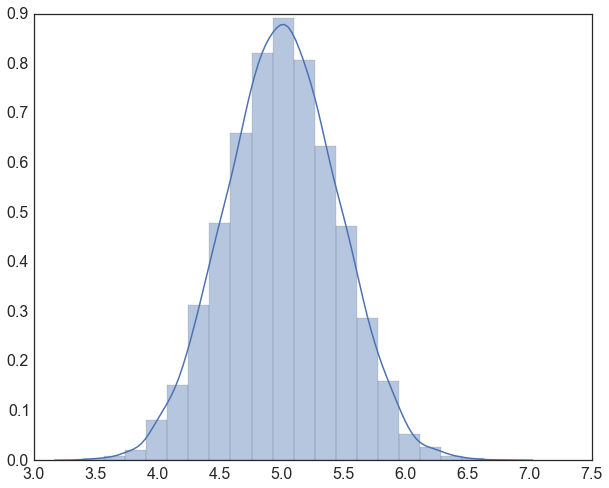

In [4]:
i = 0 # Introducing computer variable and setting its value to 0
ave = [] # Introducing an empty array

while i < 10000: # Starting a simple loop which will continue until the statement is no longer true
    x = 10 * np.random.random(40) # Choose 40 random values between 0 and 10
    # np.random.random() actually chooses random values between 0 and 1 (multiplying by 10 gives 0 to 10)
    ave.append(np.mean(x)) # Populate the ave array with the mean of each of your samples of 40
    i += 1 # Add 1 to i, which means this will carry on for the size set for the loop


sns.distplot(ave, bins = 20); # Make is distribution plot spreading the mean values in bins
# Just look at the magic

<p>Indeed, plotting a historgram of 10 000 means is bell-shaped.  This is irrespective of whether the actual variable (*x* above) was normally distributed.  Just look at the plot below.  It shows a distribution of the actual randomly selected values.   Also, watch the lecture on Z and t distributions.  It will tell you a lot more about distributions.</p>

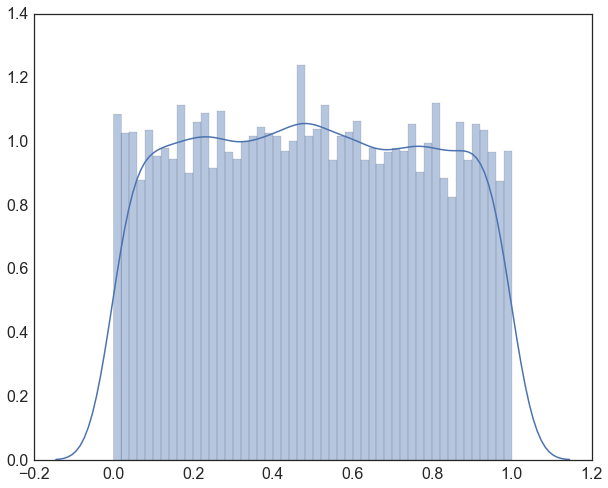

In [5]:
x = np.random.random(10000)

sns.distplot(x, bins = 50, kde = True);

<p>So even if the original said variable in the population takes on random values, taking repetative samples and calculating the mean of each sample, and finally plotting a histogram (frequency distribution) of the means (how many times each specific mean occurs) will result in a normal (bell-shaped) distribution.</p>